In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_directory_root = '/content/gdrive/My Drive/Skripsi/Datasets/Corn/main_data/train/'
val_directory_root = '/content/gdrive/My Drive/Skripsi/Datasets/Corn/main_data/validation/'
test_directory_root = '/content/gdrive/My Drive/Skripsi/Datasets/Corn/main_data/test/'

In [ ]:
#Parameter
EPOCHS = 50
INIT_LR = 0.001
batch_size = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
train_image_list, train_label_list = [], []
try:
    print("[INFO] Loading images for Training ...")
    root_dir = listdir(train_directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{train_directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{train_directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                image_directory = f"{train_directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    train_image_list.append(convert_image_to_array(image_directory))
                    train_label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images for Training ...
[INFO] Processing Corn___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Corn___healthy ...
[INFO] Processing Corn___Common_rust ...
[INFO] Processing Corn___Northern_Leaf_Blight ...
[INFO] Image loading completed


In [ ]:
val_image_list, val_label_list = [], []
try:
    print("[INFO] Loading images for Training ...")
    root_dir = listdir(val_directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{val_directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{val_directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                image_directory = f"{val_directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    val_image_list.append(convert_image_to_array(image_directory))
                    val_label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images for Training ...
[INFO] Processing Corn___healthy ...
[INFO] Processing Corn___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Corn___Common_rust ...
[INFO] Processing Corn___Northern_Leaf_Blight ...
[INFO] Image loading completed


In [ ]:
test_image_list, test_label_list = [], []
try:
    print("[INFO] Loading images for Training ...")
    root_dir = listdir(test_directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{test_directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{test_directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                image_directory = f"{test_directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    test_image_list.append(convert_image_to_array(image_directory))
                    test_label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images for Training ...
[INFO] Processing Corn___healthy ...
[INFO] Processing Corn___Northern_Leaf_Blight ...
[INFO] Processing Corn___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Corn___Common_rust ...
[INFO] Image loading completed


In [ ]:
train_image_size = len(train_image_list)
print(train_image_size)
val_image_size = len(val_image_list)
print(val_image_size)
test_image_size = len(test_image_list)
print(test_image_size)

3073
376
403


In [ ]:
x_train = np.array(train_image_list, dtype=np.float16) / 225.0
x_val = np.array(val_image_list, dtype=np.float16) / 225.0
x_test = np.array(test_image_list, dtype=np.float16) / 225.0

In [ ]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(train_label_list)
y_val = label_binarizer.fit_transform(val_label_list)
y_test = label_binarizer.fit_transform(test_label_list)
n_classes = len(label_binarizer.classes_)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(3073, 256, 256, 3)
(376, 256, 256, 3)
(403, 256, 256, 3)
(3073, 4)
(376, 4)
(403, 4)


In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
model = Sequential()
inputShape = (height, width, depth)

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      2

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [ ]:
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3)
history = model.fit(
    aug.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=EPOCHS, verbose=1,
    callbacks=[lr_reducer]
    )

Epoch 1/50
96/96 [==============================] - 46s 475ms/step - loss: 0.3738 - accuracy: 0.6620 - val_loss: 1.2326 - val_accuracy: 0.3191
Epoch 2/50
96/96 [==============================] - 43s 444ms/step - loss: 0.1913 - accuracy: 0.8270 - val_loss: 1.3360 - val_accuracy: 0.2793
Epoch 3/50
96/96 [==============================] - 44s 459ms/step - loss: 0.1543 - accuracy: 0.8773 - val_loss: 1.0505 - val_accuracy: 0.4016
Epoch 4/50
96/96 [==============================] - 43s 451ms/step - loss: 0.1377 - accuracy: 0.8885 - val_loss: 0.6853 - val_accuracy: 0.5559
Epoch 5/50
96/96 [==============================] - 43s 449ms/step - loss: 0.1170 - accuracy: 0.9119 - val_loss: 0.4616 - val_accuracy: 0.6835
Epoch 6/50
96/96 [==============================] - 43s 450ms/step - loss: 0.1049 - accuracy: 0.9300 - val_loss: 0.1846 - val_accuracy: 0.8590
Epoch 7/50
96/96 [==============================] - 43s 450ms/step - loss: 0.0951 - accuracy: 0.9254 - val_loss: 0.0531 - val_accuracy: 0.9521

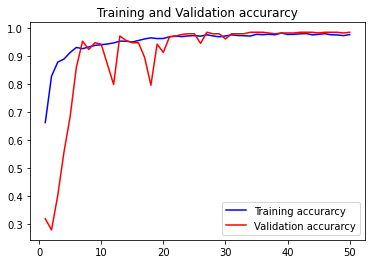

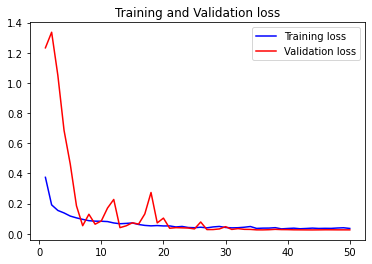

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test,y_test,verbose=1)
print("Test loss is {}".format(loss))
print("Test accuracy is {}".format(accuracy))


13/13 [==============================] - 1s 74ms/step - loss: 0.0227 - accuracy: 0.9876
Test loss is 0.02269933745265007
Test accuracy is 0.9875930547714233


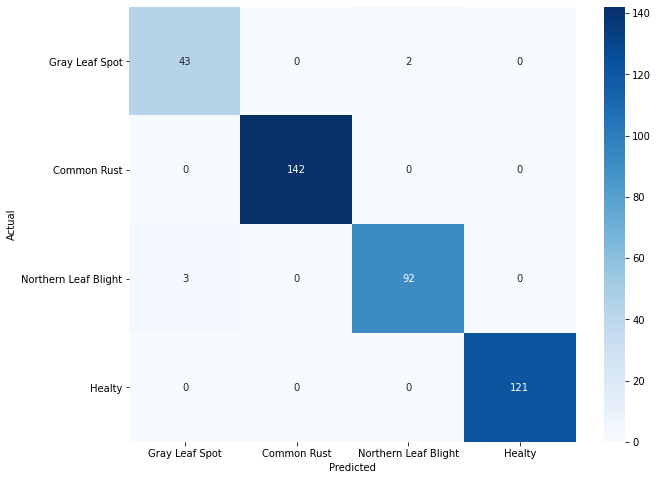

In [ ]:
from sklearn.metrics import confusion_matrix

y_true=np.argmax(y_test, axis=1)
y_pred = model.predict(x_test).argmax(axis=1)
cf_matrix = confusion_matrix(y_true, y_pred)
n_labellist = list(dict.fromkeys(train_label_list))
class_name = ['Gray Leaf Spot', 'Common Rust', 'Northern Leaf Blight','Healty']
cf_df = pd.DataFrame(cf_matrix)
cf_df.index.name = 'Actual'
cf_df.columns.name = 'Predicted'

plt.figure(figsize=(10,8))
sns.heatmap(cf_df, cmap='Blues', annot=True, fmt='d', xticklabels=class_name, yticklabels=class_name)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred,target_names=class_name))

                      precision    recall  f1-score   support

      Gray Leaf Spot       0.93      0.96      0.95        45
         Common Rust       1.00      1.00      1.00       142
Northern Leaf Blight       0.98      0.97      0.97        95
              Healty       1.00      1.00      1.00       121

            accuracy                           0.99       403
           macro avg       0.98      0.98      0.98       403
        weighted avg       0.99      0.99      0.99       403



In [ ]:
from keras.models import load_model
model.save('/content/gdrive/My Drive/Skripsi/Model/CornModel.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('/content/gdrive/My Drive/Skripsi/Model/CornModel_weights.h5')

In [ ]:
import tensorflow as tf

new_model= tf.keras.models.load_model(filepath='/content/gdrive/My Drive/Skripsi/Model/CornModel.h5')
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = tflite_converter.convert()
open("/content/gdrive/My Drive/Skripsi/Model/TF_Lite_CornModel.tflite", "wb").write(tflite_model)
print("Success")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpf7rgtxno/assets
Success
